# **Kohli Performance Analysis**
and predicting if india won based upon kohli's performance in the match

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [13]:
kohli_df = pd.read_csv('kohli.csv',parse_dates=True)
kohli_df['Date'] = pd.to_datetime(kohli_df['Date'], format="mixed")
kohli_df['Year'] = kohli_df['Date'].dt.year 
kohli_df['Runs'] = kohli_df['Runs'].astype(str)
kohli_df['Not Out'] = kohli_df['Runs'].str.contains("*",regex=False)
kohli_df['Runs'] = kohli_df['Runs'].str.replace('*','')
kohli_df['Runs'] = kohli_df['Runs'].str.replace(' ', '')
kohli_df['Result'] = kohli_df['Result'].str.replace(' ', '')
kohli_df['Runs'] = kohli_df['Runs'].astype(str).astype(int)
kohli_df['Not Out'] = kohli_df['Not Out'].astype(str).replace("True","Not Out")
kohli_df['Not Out'] = kohli_df['Not Out'].astype(str).replace("False","Out")
kohli_df[kohli_df['Result'] == 'Tied'].index

Index([60], dtype='int64')

In [14]:
kohli_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No.       81 non-null     int64         
 1   Runs      81 non-null     int64         
 2   Against   81 non-null     object        
 3   Position  81 non-null     int64         
 4   Innings   81 non-null     int64         
 5   Venue     81 non-null     object        
 6   Ground    81 non-null     object        
 7   Date      81 non-null     datetime64[ns]
 8   Result    81 non-null     object        
 9   Year      81 non-null     int32         
 10  Not Out   81 non-null     object        
dtypes: datetime64[ns](1), int32(1), int64(4), object(5)
memory usage: 6.8+ KB


In [15]:
kohli_df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Not Out
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009,Out
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010,Out
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011,Not Out


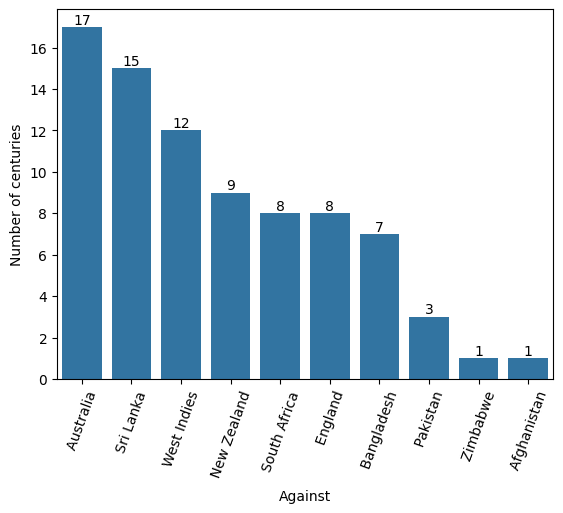

In [16]:
agpt = sns.barplot(kohli_df['Against'].value_counts(),width=0.8,gap=0)
agpt.bar_label(agpt.containers[0])
plt.xticks(rotation=70)
plt.ylabel('Number of centuries')
plt.show()

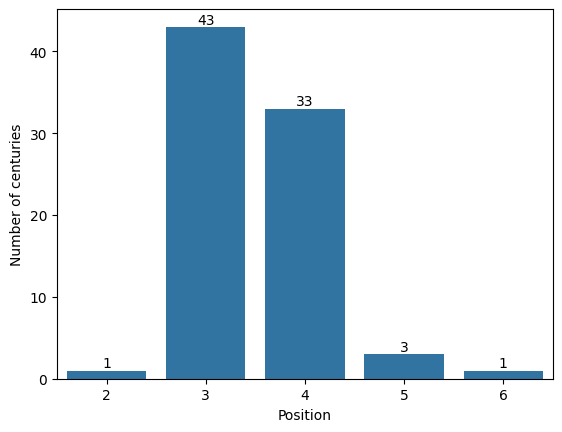

In [17]:
popt = sns.barplot(kohli_df['Position'].value_counts(),width=0.8,gap=0)
popt.bar_label(popt.containers[0])
#plt.xticks(rotation=70)
plt.ylabel('Number of centuries')
plt.show()

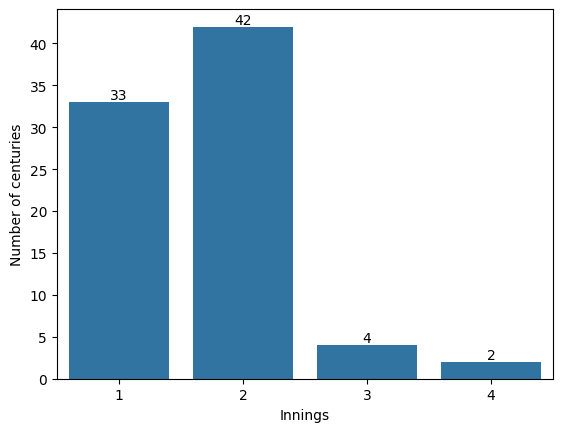

In [18]:
inpt = sns.barplot(kohli_df['Innings'].value_counts(),width=0.8,gap=0)
inpt.bar_label(inpt.containers[0])
#plt.xticks(rotation=70)
plt.ylabel('Number of centuries')
plt.show()

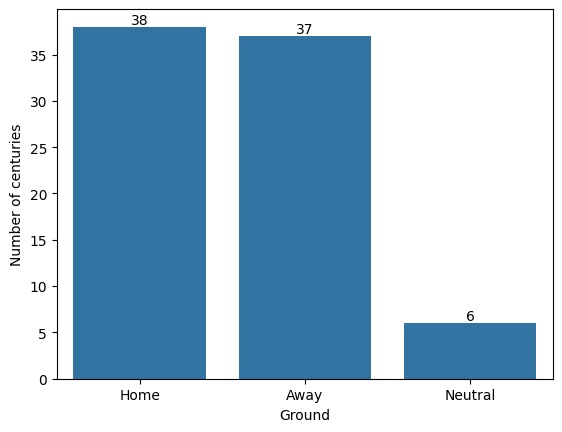

In [19]:
gdpt = sns.barplot(kohli_df['Ground'].value_counts(),width=0.8,gap=0)
gdpt.bar_label(gdpt.containers[0])
#plt.xticks(rotation=70)
plt.ylabel('Number of centuries')
plt.show()

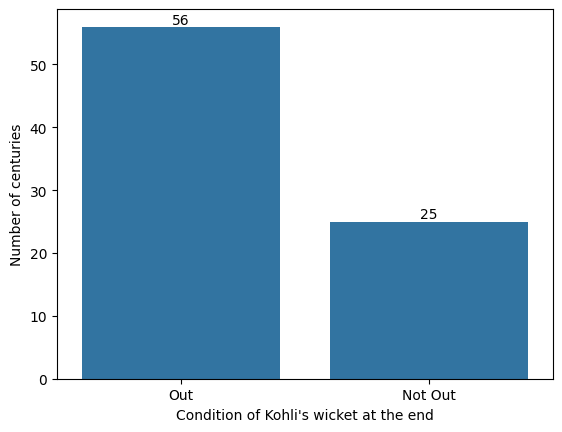

In [20]:
gdpt = sns.barplot(kohli_df['Not Out'].value_counts(),width=0.8,gap=0)
gdpt.bar_label(gdpt.containers[0])
#plt.xticks(rotation=70)
plt.ylabel('Number of centuries')
plt.xlabel('Condition of Kohli\'s wicket at the end')
plt.show()

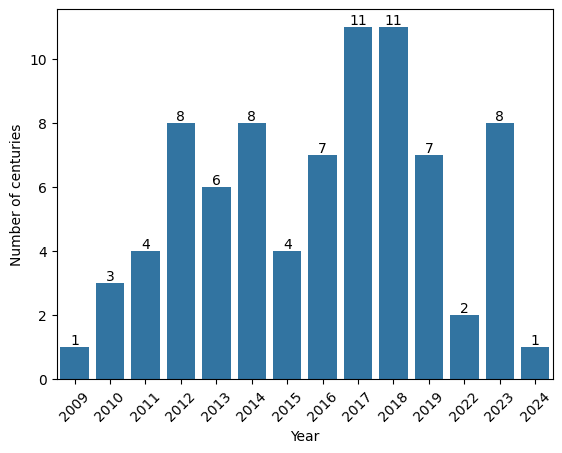

In [21]:
gdpt = sns.barplot(kohli_df['Year'].value_counts(),width=0.8,gap=0)
gdpt.bar_label(gdpt.containers[0])
plt.xticks(rotation=45)
plt.ylabel('Number of centuries')
plt.show()

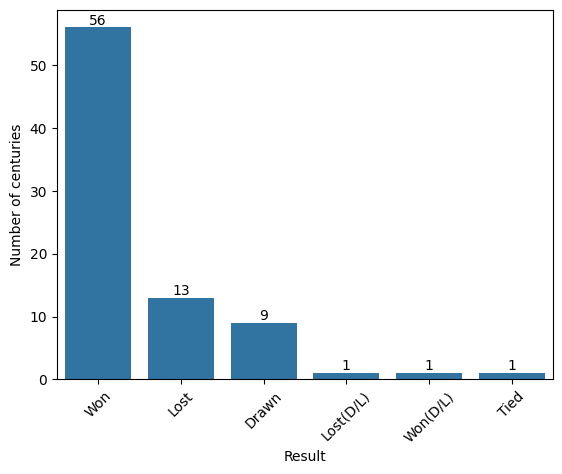

In [22]:
gdpt = sns.barplot(kohli_df['Result'].value_counts(),width=0.8,gap=0)
gdpt.bar_label(gdpt.containers[0])
plt.xticks(rotation=45)
plt.ylabel('Number of centuries')
plt.show()

In [23]:
corrmat = kohli_df.corr(numeric_only=True)
print(corrmat)

               No.      Runs  Position   Innings      Year
No.       1.000000  0.176172 -0.251737 -0.133864  0.977592
Runs      0.176172  1.000000  0.181191 -0.191191  0.141900
Position -0.251737  0.181191  1.000000  0.298163 -0.258531
Innings  -0.133864 -0.191191  0.298163  1.000000 -0.153637
Year      0.977592  0.141900 -0.258531 -0.153637  1.000000


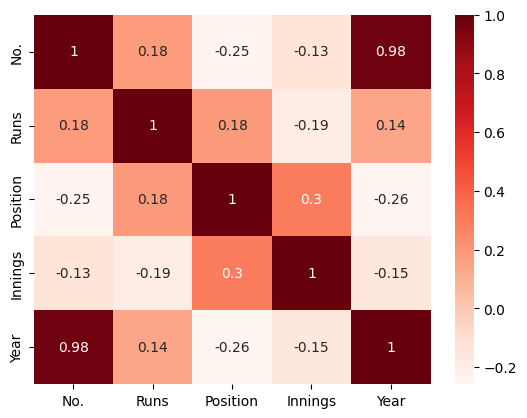

In [24]:
sns.heatmap(corrmat, cmap='Reds', annot=True)
plt.show()

In [25]:
kohli_df.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Not Out
76,77,122,Pakistan,3,1,"R. Premadasa Stadium, Colombo",Neutral,2023-09-11,Won,2023,Not Out
77,78,103,Bangladesh,3,2,"Maharashtra Cricket Association Stadium, Pune",Home,2023-10-19,Won,2023,Not Out
78,79,101,South Africa,3,1,"Eden Gardens, Kolkata",Home,2023-11-05,Won,2023,Not Out
79,80,117,New Zealand,3,1,"Wankhede Stadium, Mumbai",Home,2023-11-15,Won,2023,Out
80,81,100,Australia,4,3,"Perth Stadium, Perth",Away,2024-11-22,Won,2024,Not Out


In [59]:
kohli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 80
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No.        71 non-null     int64         
 1   Runs       71 non-null     int64         
 2   Against    71 non-null     object        
 3   Position   71 non-null     int64         
 4   Innings    71 non-null     int64         
 5   Venue      71 non-null     object        
 6   Ground     71 non-null     object        
 7   Date       71 non-null     datetime64[ns]
 8   Result     71 non-null     object        
 9   Year       71 non-null     int32         
 10  Not Out    71 non-null     object        
 11  Match_Won  71 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(5), object(5)
memory usage: 6.9+ KB


In [38]:
kohli_df["Result"].str.strip()
kohli_df["Result"].unique()

array(['Won', 'Lost(D/L)', 'Lost', 'Drawn', 'Won(D/L)', 'Tied'],
      dtype=object)

In [43]:
kohli_df["Match_Won"] = kohli_df["Result"].apply(lambda x: 1 if x in ["Won","Won(D/L)"] else 0 if x in ["Lost","Lost(D/L)"] else None)
kohli_df = kohli_df.dropna(subset = "Match_Won")
kohli_df["Match_Won"] = kohli_df["Match_Won"].astype(int)
kohli_df["Match_Won"].info()

<class 'pandas.core.series.Series'>
Index: 71 entries, 0 to 80
Series name: Match_Won
Non-Null Count  Dtype
--------------  -----
71 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


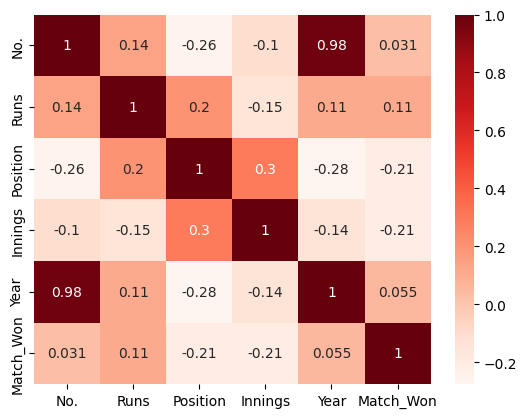

In [55]:
corrmat = kohli_df.corr(numeric_only=True)
sns.heatmap(corrmat, cmap='Reds', annot=True)
plt.show()

In [51]:
train = kohli_df[kohli_df["No."] < 60].copy()
test = kohli_df[kohli_df["No."] >= 60].copy()

In [52]:
train.shape

(52, 12)

In [53]:
test.shape

(19, 12)

In [64]:
X_train = train[["No.", "Runs", "Position", "Innings", "Year"]]
Y_train = train["Match_Won"]
X_test = test[["No.", "Runs", "Position", "Innings", "Year"]]
Y_test = test["Match_Won"]

In [65]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [66]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [67]:
Y_test

59    1
61    0
62    0
63    1
64    1
65    0
66    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
76    1
77    1
78    1
79    1
80    1
Name: Match_Won, dtype: int64

In [68]:
model.score(X_test,Y_test)

0.7894736842105263

In [69]:
model.predict_proba(X_test)

array([[0.24297605, 0.75702395],
       [0.37257965, 0.62742035],
       [0.48237517, 0.51762483],
       [0.39673176, 0.60326824],
       [0.30483668, 0.69516332],
       [0.33382701, 0.66617299],
       [0.30147078, 0.69852922],
       [0.38105164, 0.61894836],
       [0.08498011, 0.91501989],
       [0.47236469, 0.52763531],
       [0.18671389, 0.81328611],
       [0.35563003, 0.64436997],
       [0.36131796, 0.63868204],
       [0.19036402, 0.80963598],
       [0.35010577, 0.64989423],
       [0.48960534, 0.51039466],
       [0.44818135, 0.55181865],
       [0.3882153 , 0.6117847 ],
       [0.73317202, 0.26682798]])